In [1]:
%pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import math
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
brands_qu = pd.read_csv('./Datasets/Qual/brands.csv') 
orderlines_qu = pd.read_csv('./Datasets/Qual/orderlines.csv')
orders_au = pd.read_csv('./Datasets/Qual/orders.csv')
products_cat = pd.read_csv('./Datasets/Qual/products.csv')

In [4]:
# Incorporating additional information into orderlines data frame

orderlines_qu['short'] = orderlines_qu['sku'].str[:3]

orderlines_expanded = (
    orderlines_qu
    .merge(products_cat,
           on='sku')
    .merge(brands_qu,
           on='short')
    .rename(columns={'long':'brand'})
    .drop(columns='short')
)

# Creating composite columns

orderlines_expanded['revenue'] = (
    orderlines_expanded['unit_price'] * orderlines_expanded['product_quantity']
)

orderlines_expanded = orderlines_expanded.merge(
    orderlines_expanded.groupby('sku').agg(max_price=('unit_price', 'max')),
    on="sku"
)

orderlines_expanded['discount'] = (
    orderlines_expanded['max_price'] - orderlines_expanded['unit_price']
)

orderlines_expanded['total_discount'] = (
    orderlines_expanded['discount'] * orderlines_expanded['product_quantity']
)
orderlines_expanded['percentage_discount'] = (
    100 * orderlines_expanded['discount'] / orderlines_expanded['max_price']
)

orderlines_expanded["date"] = pd.to_datetime(orderlines_expanded["date"]) 
orderlines_expanded["month"] = orderlines_expanded["date"].dt.strftime("%Y%m")

In [5]:
orderlines_expanded.drop(["Unnamed: 0_x", "index_x", "Unnamed: 0.1","Unnamed: 0_y", "index_y"], axis=1, inplace=True)
orderlines_expanded

,id,id_order,product_quantity,sku,unit_price,date,revenue,name,desc,in_stock,type,price,category,brand,max_price,discount,total_discount,percentage_discount,month
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,1,12755395,60.99,Connectivity & Adapters,OWC,49.99,2.50,2.50,5.001000,201701
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0,5720,22.95,"Charging Dock, Chargers, Stands, Supports",iOttie,19.99,1.00,1.00,5.002501,201701
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1,13005399,89.00,"Charging Dock, Chargers, Stands, Supports",Apple,75.99,3.80,3.80,5.000658,201701
3,1119126,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,2565.99,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,0,1282,3209.00,Apple iMac,Pack,2721.99,156.00,156.00,5.731101,201701
4,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,0,1298,76.99,"NAS, HDD, SSD, Memory stick and cards",Crucial,60.90,0.00,0.00,0.000000,201701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61357,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,0,13835403,24.99,"Protection, Cases, Backpacks",Tucano,23.99,7.47,7.47,31.137974,201803
61358,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1,1230,25.00,Cables,Apple,14.99,5.00,10.00,33.355570,201803
61359,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1,1230,25.00,Cables,Apple,14.99,5.00,10.00,33.355570,201803
61360,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1,1230,25.00,Cables,Apple,14.99,5.00,15.00,33.355570,201803


## Slide 3

C:\Users\Andri\AppData\Local\Temp\ipykernel_12592\1124566296.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


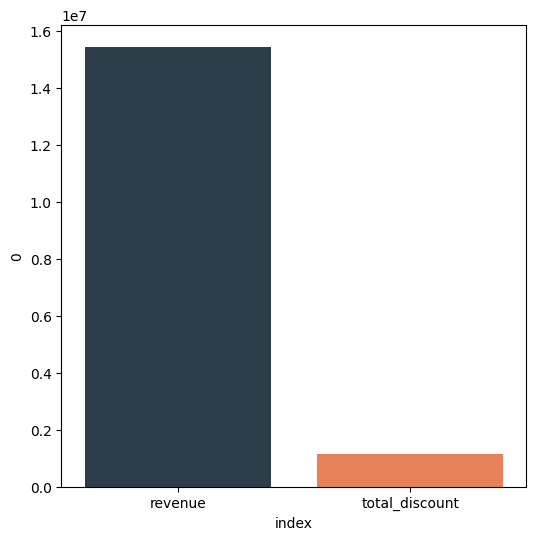

In [6]:
# General overview

local_path = "./Charts/"

if not os.path.exists(local_path):
    os.makedirs(local_path)
    

tot_revenue_discount=orderlines_expanded.agg({
    "revenue":"sum",
    "total_discount":"sum"
})

tot_revenue_discount

fig = plt.figure(figsize=(6, 6))
fig.patch.set_alpha(0.0)
plt.gca().patch.set_alpha(0.0)
sns.barplot(
    data=tot_revenue_discount.reset_index(),
    x='index',
    y=0,
    palette={'total_discount': '#FE7743', 'revenue': '#273F4F'}
)
fig.savefig('./Charts/1.tot_revenue_discount.png', dpi=300, transparent=True);

## Slide 4

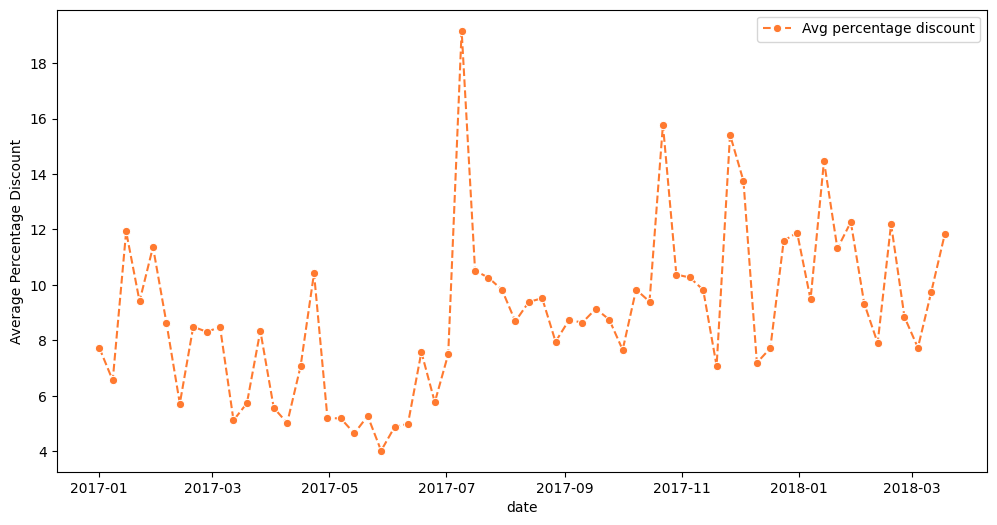

In [7]:
weekly_discount = (
    orderlines_expanded
    .resample('W-SUN', on='date')['percentage_discount']
    .mean()
    .reset_index()
)
# Plot the Average Percentage Discount on the second axes
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.lineplot(
    data=weekly_discount,
    x="date",
    y="percentage_discount",
    label="Avg percentage discount",
    marker='o',
    linestyle='--',
    color='#FF7A30'
)
ax1.set_ylabel("Average Percentage Discount")
fig.savefig('./Charts/2avg_per_discount.png', dpi=300, transparent=True);

## Relationship between qty and discount 5

In [8]:
brand_set = (set(orderlines_expanded.groupby("brand")["revenue"].sum().nlargest(10).reset_index().brand))
category_set = (set(orderlines_expanded.groupby("category")["revenue"].sum().nlargest(10).reset_index().category))

brand_mask = orderlines_expanded.brand.isin(brand_set)
category_mask = orderlines_expanded.category.isin(category_set)

monthlyINF_brands_cats = orderlines_expanded.copy()

monthlyINF_brands_cats["top_brand"] = ""
monthlyINF_brands_cats["top_category"] = ""
monthlyINF_brands_cats.loc[brand_mask, 'top_brand'] = "In TOP Brands"
monthlyINF_brands_cats.loc[category_mask, 'top_category'] = "In TOP Categories"
monthlyINF_brands_cats.loc[~brand_mask, 'top_brand'] = "NOT in TOP Brands"
monthlyINF_brands_cats.loc[~category_mask, 'top_category'] = "NOT in TOP Categories"

monthlyINF_brands_cats

def outlier_mask(dataframe_, num_col):
  #print()
 q3= dataframe_[num_col].quantile(0.75)
 q1= dataframe_[num_col].quantile(0.25)
 iqr = q3 - q1
 outlier_1 = q1 - (1.5 * iqr)
 outlier_2 = q3 + (1.5 * iqr)
 mask = (dataframe_[num_col] < outlier_1) | (dataframe_[num_col] > outlier_2)
 return mask

monthly_info_BRCAT_WOUT = monthlyINF_brands_cats.loc[outlier_mask(monthlyINF_brands_cats, "revenue")]

In [9]:
monthlyINF_brands_cats

,id,id_order,product_quantity,sku,unit_price,date,revenue,name,desc,in_stock,...,price,category,brand,max_price,discount,total_discount,percentage_discount,month,top_brand,top_category
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,1,...,60.99,Connectivity & Adapters,OWC,49.99,2.50,2.50,5.001000,201701,In TOP Brands,NOT in TOP Categories
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0,...,22.95,"Charging Dock, Chargers, Stands, Supports",iOttie,19.99,1.00,1.00,5.002501,201701,NOT in TOP Brands,NOT in TOP Categories
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1,...,89.00,"Charging Dock, Chargers, Stands, Supports",Apple,75.99,3.80,3.80,5.000658,201701,In TOP Brands,NOT in TOP Categories
3,1119126,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,2565.99,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,0,...,3209.00,Apple iMac,Pack,2721.99,156.00,156.00,5.731101,201701,In TOP Brands,In TOP Categories
4,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,0,...,76.99,"NAS, HDD, SSD, Memory stick and cards",Crucial,60.90,0.00,0.00,0.000000,201701,In TOP Brands,In TOP Categories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61357,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,0,...,24.99,"Protection, Cases, Backpacks",Tucano,23.99,7.47,7.47,31.137974,201803,NOT in TOP Brands,In TOP Categories
61358,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1,...,25.00,Cables,Apple,14.99,5.00,10.00,33.355570,201803,In TOP Brands,NOT in TOP Categories
61359,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1,...,25.00,Cables,Apple,14.99,5.00,10.00,33.355570,201803,In TOP Brands,NOT in TOP Categories
61360,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1,...,25.00,Cables,Apple,14.99,5.00,15.00,33.355570,201803,In TOP Brands,NOT in TOP Categories


In [10]:
# function to categorize discount levels
def discount_lvl(dicsount):
    if dicsount <= 10:
        return 'Low or Negative'
    elif dicsount <= 25:
        return 'Medium'
    else:
        return "High"
    
# df for calculation average discount by brands
tmp = orderlines_expanded.groupby(["date","brand"])[["revenue", "total_discount"]].sum()
tmp["avg_disc_brand_%"] = 100 * tmp["total_discount"] / tmp["revenue"]
tmp["avg_disc_brand_disc_category"] = tmp["avg_disc_brand_%"].apply(discount_lvl)
tmp_brnds_peaks = tmp.loc[tmp.avg_disc_brand_disc_category != "Low or Negative"]

tmp_brnds_peaks = tmp_brnds_peaks.reset_index()

tmp["avg_disc_brand_disc_category"] = tmp["avg_disc_brand_%"].apply(discount_lvl)
tmp_brnds_peaks=tmp.loc[tmp.avg_disc_brand_disc_category != "Low or Negative"]

monthlyINF_brands_cats["disc_cat"] = orderlines_expanded.percentage_discount.apply(discount_lvl)

not_low_disc_mask = monthlyINF_brands_cats.disc_cat != "Low or Negative"
top_brand_mask = monthlyINF_brands_cats.brand.isin(brand_set)

info_qty_disc_brand = monthlyINF_brands_cats.loc[
        not_low_disc_mask 
        &
        top_brand_mask
    ].groupby(["disc_cat", "brand"]).agg(
        Qty_discounts=("id_order", "count"),
        Avg_discount=("percentage_discount", "mean"),
)

info_qty_disc_brand.reset_index()

,disc_cat,brand,Qty_discounts,Avg_discount
0,High,Apple,1538,31.880763
1,High,Crucial,306,31.551606
2,High,Dell,11,35.037877
3,High,LG,5,27.413769
4,High,LaCie,613,31.037180
5,High,OWC,342,34.620911
6,High,Pack,161,39.983882
7,High,Wacom,87,33.266829
8,High,Western Digital,90,30.110097
9,Medium,Apple,3091,16.512221


In [11]:
info_qty_disc_category = monthlyINF_brands_cats.loc[
        not_low_disc_mask 
        &
        top_brand_mask
    ].groupby(["disc_cat", "category"]).agg(
        Qty_discounts=("id_order", "count"),
        Avg_discount=("percentage_discount", "mean"),
)

info_qty_disc_category.reset_index()

,disc_cat,category,Qty_discounts,Avg_discount
0,High,Apple MacBook,36,27.245997
1,High,Apple iMac,4,32.497598
2,High,Apple iPad,4,26.361804
3,High,Apple iPhone,344,27.224191
4,High,Cables,541,37.288183
5,High,"Charging Dock, Chargers, Stands, Supports",5,30.100524
6,High,Connectivity & Adapters,78,49.584652
7,High,Electronic Devises,359,27.605962
8,High,"Input devices, styluses",10,30.541712
9,High,Monitors,30,31.498801


In [12]:
info_qty_disc_category=pd.DataFrame(info_qty_disc_category)

info_qty_disc_brand_sum = info_qty_disc_brand.agg({
    "Qty_discounts": "sum",
    "Avg_discount": "mean"
})

info_qty_disc_brand_sum

monthlyINF_brands_cats

,id,id_order,product_quantity,sku,unit_price,date,revenue,name,desc,in_stock,...,category,brand,max_price,discount,total_discount,percentage_discount,month,top_brand,top_category,disc_cat
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,1,...,Connectivity & Adapters,OWC,49.99,2.50,2.50,5.001000,201701,In TOP Brands,NOT in TOP Categories,Low or Negative
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0,...,"Charging Dock, Chargers, Stands, Supports",iOttie,19.99,1.00,1.00,5.002501,201701,NOT in TOP Brands,NOT in TOP Categories,Low or Negative
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1,...,"Charging Dock, Chargers, Stands, Supports",Apple,75.99,3.80,3.80,5.000658,201701,In TOP Brands,NOT in TOP Categories,Low or Negative
3,1119126,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,2565.99,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,0,...,Apple iMac,Pack,2721.99,156.00,156.00,5.731101,201701,In TOP Brands,In TOP Categories,Low or Negative
4,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,0,...,"NAS, HDD, SSD, Memory stick and cards",Crucial,60.90,0.00,0.00,0.000000,201701,In TOP Brands,In TOP Categories,Low or Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61357,1649474,525664,1,TUC0207,16.52,2018-03-14 11:45:05,16.52,Tucano Elements Second Skin Macbook Sleeve 12 ...,velvety inner protective case for MacBook 12 i...,0,...,"Protection, Cases, Backpacks",Tucano,23.99,7.47,7.47,31.137974,201803,NOT in TOP Brands,In TOP Categories,High
61358,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1,...,Cables,Apple,14.99,5.00,10.00,33.355570,201803,In TOP Brands,NOT in TOP Categories,High
61359,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1,...,Cables,Apple,14.99,5.00,10.00,33.355570,201803,In TOP Brands,NOT in TOP Categories,High
61360,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,1,...,Cables,Apple,14.99,5.00,15.00,33.355570,201803,In TOP Brands,NOT in TOP Categories,High


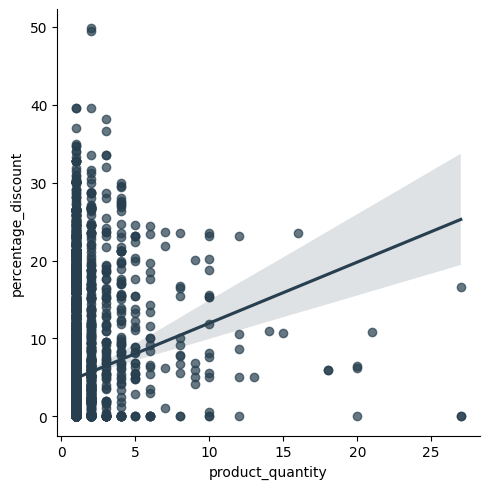

In [13]:
monthly_info_BRCAT_WOUT_tmp=monthly_info_BRCAT_WOUT.drop("top_brand", axis=1)
qty_mask = monthly_info_BRCAT_WOUT_tmp.product_quantity < 30
discount_mask = monthly_info_BRCAT_WOUT_tmp.percentage_discount < 50

sns.lmplot(
    data=monthly_info_BRCAT_WOUT_tmp.loc[qty_mask&discount_mask,:],
    x='product_quantity',
    y='percentage_discount',
  
    scatter_kws={'color': '#273F4F','alpha': 0.7}, # Pass alpha to the scatter points
    
    line_kws={'color': '#273F4F'}
)
plt.savefig('./Charts/3avg_week_disc.png', dpi=300, transparent=True)

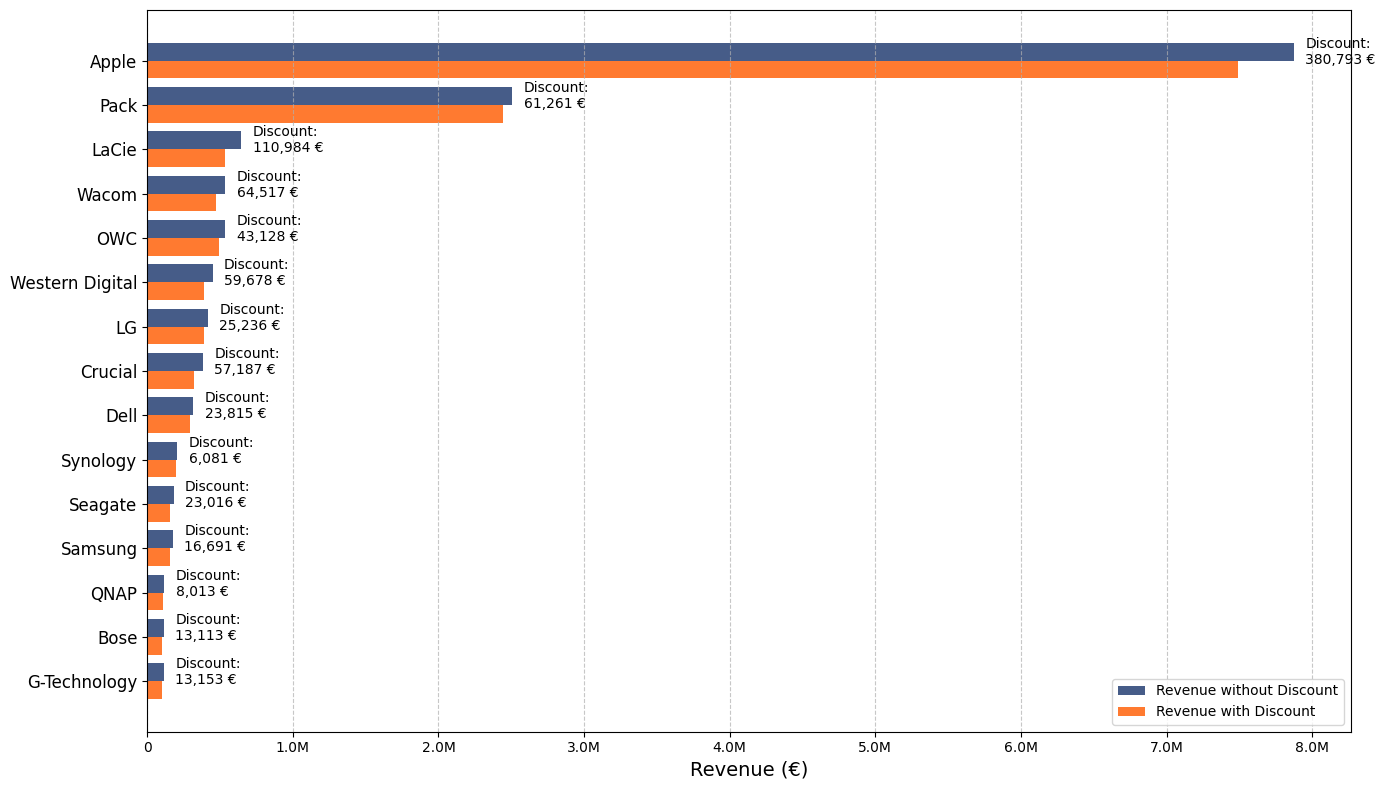

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Ensure calculations are present
orderlines_expanded['revenue_without_discount'] = orderlines_expanded['max_price'] * orderlines_expanded['product_quantity']

# Aggregate by brand
summary = orderlines_expanded.groupby('brand').agg({
    'revenue': 'sum',
    'revenue_without_discount': 'sum',
    'total_discount': 'sum'
})

# Top 15 brands by revenue without discount
top15 = summary.nlargest(15, 'revenue_without_discount').sort_values('revenue_without_discount')

plt.figure(figsize=(14, 8))
bar_width = 0.4
index = range(len(top15))

# Plotting revenue without discount
plt.barh(
    [i + bar_width/2 for i in index], 
    top15['revenue_without_discount'], 
    height=bar_width, 
    label='Revenue without Discount', 
    color='#465C88' # Changed color
)

# Plotting revenue with discount
plt.barh(
    [i - bar_width/2 for i in index], 
    top15['revenue'], 
    height=bar_width, 
    label='Revenue with Discount', 
    color='#FF7A30' # Changed color
)

plt.yticks(index, top15.index, fontsize=12)
plt.xlabel('Revenue (€)', fontsize=14)
# plt.title('Revenue with and without Discount for Top 15 Brands', fontsize=16)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# X-axis formatting for large numbers
def millions(x, pos):
    if x >= 1_000_000:
        return f'{x*1e-6:.1f}M'
    elif x >= 1_000:
        return f'{x*1e-3:.0f}K'
    else:
        return f'{x:.0f}'

formatter = FuncFormatter(millions)
plt.gca().xaxis.set_major_formatter(formatter)

# Writing discount values next to the bars
for i, (revenue, revenue_no_disc, discount) in enumerate(zip(top15['revenue'], top15['revenue_without_discount'], top15['total_discount'])):
    plt.text(
        revenue_no_disc + (top15['revenue_without_discount'].max() * 0.01), 
        i + bar_width/2, 
        f'Discount:\n{discount:,.0f} €', 
        va='center', 
        fontsize=10, 
        color='black' # Changed font color for better visibility
    )

plt.savefig('./Charts/Revenue with and without Discount for Top 15 Brands.png', dpi=300, transparent=True)
plt.tight_layout()
plt.show()

## 6 Average Discounts and number of items sold (TOP 10 Brands)

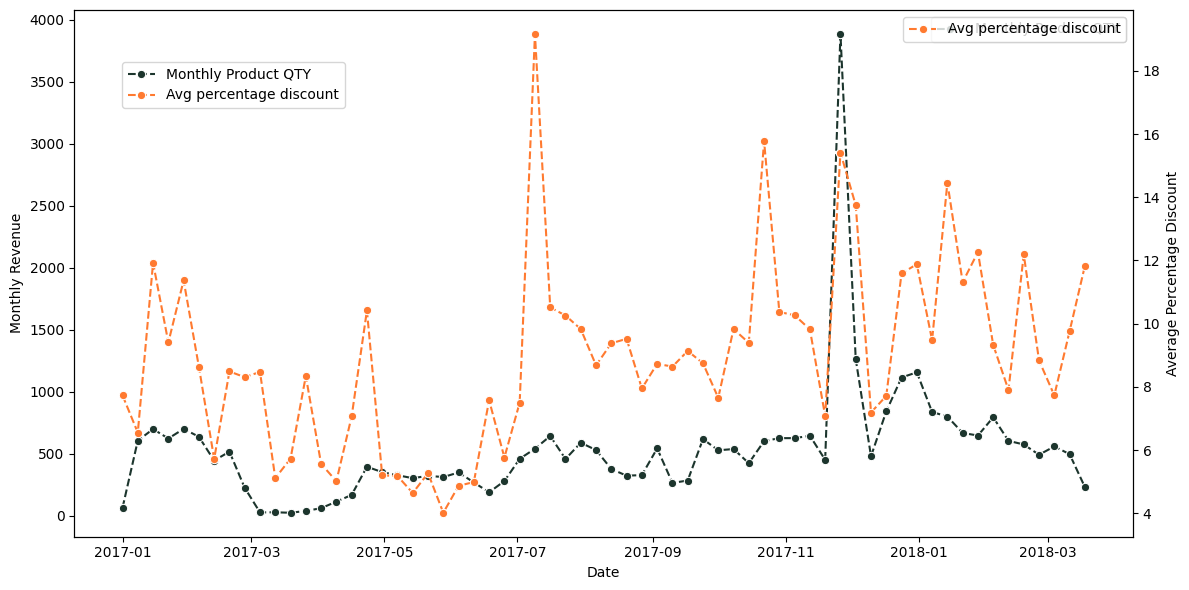

In [15]:

top10_discounted_brand =  orderlines_expanded.groupby("brand")[["total_discount"]].sum() \
    .nlargest(10, columns="total_discount").reset_index().drop("total_discount", axis=1)

brand_mask = orderlines_expanded.brand.isin(set(top10_discounted_brand.brand))

monthly_info_top10_brands = orderlines_expanded.loc[brand_mask,:] \
    .resample("W", on="date").agg(
    monthly_revenue_10=("revenue", "sum"),
    monthly_product_qty_10 =("product_quantity", "sum"),
    monthly_discount_10 = ("total_discount", "sum"),
    monthly_order_qty_10 =("id_order", "count"),
    monthly_avg_discount_10 = ("percentage_discount", "mean")
    
) 


monthly_info_other_brands = orderlines_expanded.loc[~brand_mask,:] \
    .resample("W", on="date").agg(
    monthly_revenue_o=("revenue", "sum"),
    monthly_product_qty_o =("product_quantity", "sum"),
    monthly_discount_o = ("total_discount", "sum"),
    monthly_order_qty_o =("id_order", "count"),
    monthly_avg_discount_o = ("percentage_discount", "mean")
) 


weekly_discount = (
    orderlines_expanded
    .resample('W-SUN', on='date')['percentage_discount']
    .mean()
    .reset_index()
)
# Plot
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and the first axes (for revenue)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the Monthly Revenue line on the first axes
sns.lineplot(
    data=monthly_info_top10_brands,
    x="date",
    y="monthly_product_qty_10",
    label="Monthly Product QTY",
    ax=ax1,
    marker='o',
    linestyle='--',
    color='#1C352D'
)
ax1.set_ylabel("Monthly Revenue")
ax1.set_xlabel("Date")

# Create a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Plot the Average Percentage Discount on the second axes
sns.lineplot(
    data=weekly_discount,
    x="date",
    y="percentage_discount",
    label="Avg percentage discount",
    ax=ax2,
    marker='o',
    linestyle='--',
    color='#FF7A30'
)
ax2.set_ylabel("Average Percentage Discount")

# Display the legend for both lines
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# plt.title("Monthly Revenue and Average Weekly Discount Over Time")
plt.tight_layout()
fig.savefig('./Charts/6top_brands_qty-dicounts.png', dpi=300, transparent=True)
plt.show()

## Average Discounts and number of items sold (Other Brands) 7

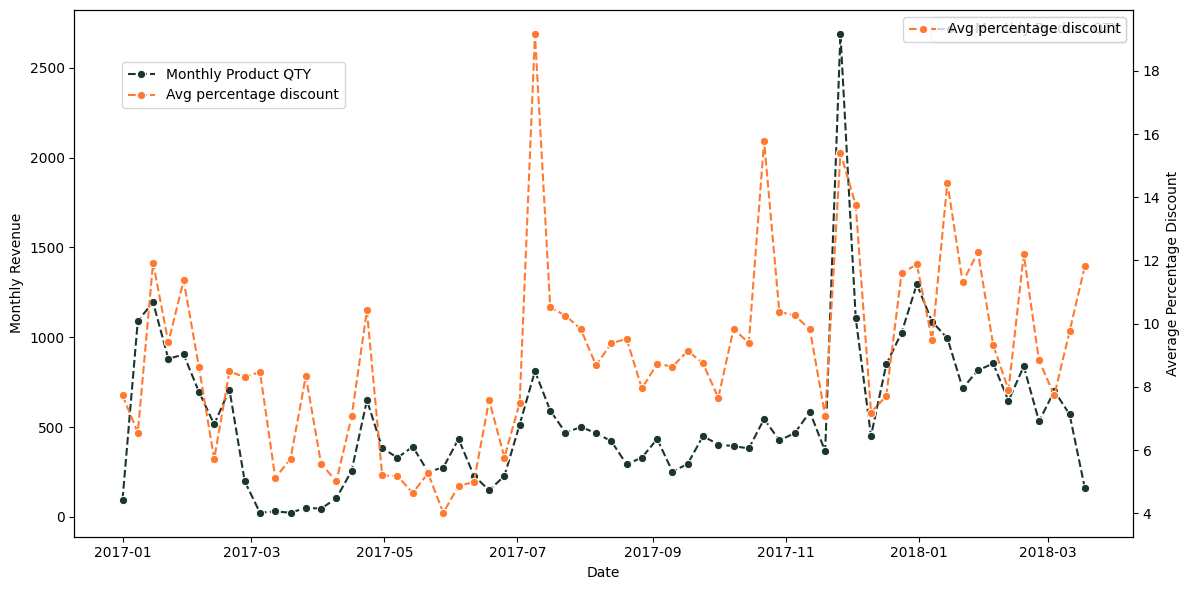

In [16]:

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and the first axes (for revenue)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the Monthly Revenue line on the first axes
sns.lineplot(
    data=monthly_info_other_brands,
    x="date",
    y="monthly_product_qty_o",
    label="Monthly Product QTY",
    ax=ax1,
    marker='o',
    linestyle='--',
    color='#1C352D'
)
ax1.set_ylabel("Monthly Revenue")
ax1.set_xlabel("Date")

# Create a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Plot the Average Percentage Discount on the second axes
sns.lineplot(
    data=weekly_discount,
    x="date",
    y="percentage_discount",
    label="Avg percentage discount",
    ax=ax2,
    marker='o',
    linestyle='--',
    color='#FF7A30'
)
ax2.set_ylabel("Average Percentage Discount")

# Display the legend for both lines
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# plt.title("Monthly Revenue and Average Weekly Discount Over Time")
plt.tight_layout()
fig.savefig('./Charts/7other_brands_qty-dicounts.png', dpi=300, transparent=True)
plt.show()

## TOP Brands and discount groups 8

In [17]:
# monthly_info_BRCAT_WOUT = monthly_info_BRCAT_WOUT.drop(["product_id", "month"], axis=1)
monthly_info_BRCAT_WOUT.columns

Index(['id', 'id_order', 'product_quantity', 'sku', 'unit_price', 'date',
       'revenue', 'name', 'desc', 'in_stock', 'type', 'price', 'category',
       'brand', 'max_price', 'discount', 'total_discount',
       'percentage_discount', 'month', 'top_brand', 'top_category'],
      dtype='object')

In [18]:

monthly_info_BRCAT_WOUT

,id,id_order,product_quantity,sku,unit_price,date,revenue,name,desc,in_stock,...,price,category,brand,max_price,discount,total_discount,percentage_discount,month,top_brand,top_category
3,1119126,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,2565.99,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,0,...,3209.00,Apple iMac,Pack,2721.99,156.00,156.00,5.731101,201701,In TOP Brands,In TOP Categories
17,1119254,299609,1,PAR0071,474.05,2017-01-01 10:51:38,474.05,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,0,...,699.00,Electronic Devises,Parrot,679.99,205.94,205.94,30.285739,201701,NOT in TOP Brands,In TOP Categories
19,1119256,299600,1,PAC0492,4260.99,2017-01-01 10:52:44,4260.99,Apple Mac Pro Quad-Core 37GHz | 64 GB RAM | 1T...,Apple Mac Pro Quad-Core 37GHz 64GB RAM and 1TB...,0,...,5729.00,Apple iMac,Pack,4680.99,420.00,420.00,8.972461,201701,In TOP Brands,In TOP Categories
24,1119296,298391,1,PAC1594,2769.99,2017-01-01 11:41:04,2769.99,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",Desktop computer iMac 27-inch 3.2GHz Core i5 5...,0,...,3889.00,Apple iMac,Pack,2848.99,79.00,79.00,2.772913,201701,In TOP Brands,In TOP Categories
39,1119405,299664,1,APP0958,1351.99,2017-01-01 12:57:21,1351.99,"Apple MacBook Pro Retina 13 ""i5 27 Ghz | 8GB R...",New MacBook Pro 13-inch Retina screen i5 128GB...,0,...,1449.00,Apple iMac,Apple,1351.99,0.00,0.00,0.000000,201701,In TOP Brands,In TOP Categories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61274,1648443,526507,1,APP2489,1099.00,2018-03-13 15:51:57,1099.00,Apple iPhone 64GB Space Gray X,New Free iPhone 64GB X,1,...,1159.00,Apple iPhone,Apple,1159.00,60.00,60.00,5.176877,201803,In TOP Brands,In TOP Categories
61291,1648656,526612,1,APP2486,875.21,2018-03-13 19:23:33,875.21,Apple iPhone 8 Plus 256GB Space Gray,Apple iPhone 8 Plus 256GB in Space Gray,0,...,1089.00,Apple iPhone,Apple,1087.22,212.01,212.01,19.500193,201803,In TOP Brands,In TOP Categories
61293,1648662,526615,1,LGE0057,749.00,2018-03-13 19:29:26,749.00,"LG 34UC99-W Monitor 34 ""WQHD Curvy USB-C 5ms M...",Monitor 34 inches WQHD sRGB 99% with inclinabl...,0,...,999.00,Monitors,LG,999.00,250.00,250.00,25.025025,201803,In TOP Brands,In TOP Categories
61298,1648728,526648,1,APP2073,1199.00,2018-03-13 20:40:12,1199.00,"Apple MacBook Air 13 ""Core i5 18GHz | 8GB RAM ...",laptop MacBook Air 13 inch i5 18GHz 8GB RAM an...,1,...,1355.59,Apple MacBook,Apple,1294.59,95.59,95.59,7.383805,201803,In TOP Brands,In TOP Categories


In [19]:
week_t10_discCat = monthlyINF_brands_cats.groupby(["date" , "top_brand", "disc_cat", "brand"]).agg({
    "revenue": "sum",
    "product_quantity": "sum",
    "total_discount": "sum",
    "id_order": "count",
    "percentage_discount": "mean"
}).reset_index()

# Get unique values for top_brand and disc_cat
brands = week_t10_discCat['top_brand'].unique()
disc_cats = ['High', 'Medium', "Low or Negative"]

In [20]:
general_correlation = monthlyINF_brands_cats.groupby(["date", "top_brand", "disc_cat"]).agg({
    "product_quantity": "sum",
    "percentage_discount": "mean"
}).reset_index()

correlation_by_group = general_correlation.groupby(['top_brand', 'disc_cat'])[['product_quantity', 'percentage_discount']].corr()

correlation_series = correlation_by_group.unstack().iloc[:, 1]
correlation_series.name = 'correlation_coefficient'

corr_df = correlation_series.reset_index()

corr_df.to_csv("correlation_results_base.csv", index=False)

corr_df

,top_brand,disc_cat,correlation_coefficient
0,In TOP Brands,High,0.076644
1,In TOP Brands,Low or Negative,0.055746
2,In TOP Brands,Medium,0.025749
3,NOT in TOP Brands,High,0.069335
4,NOT in TOP Brands,Low or Negative,0.021433
5,NOT in TOP Brands,Medium,-0.005397


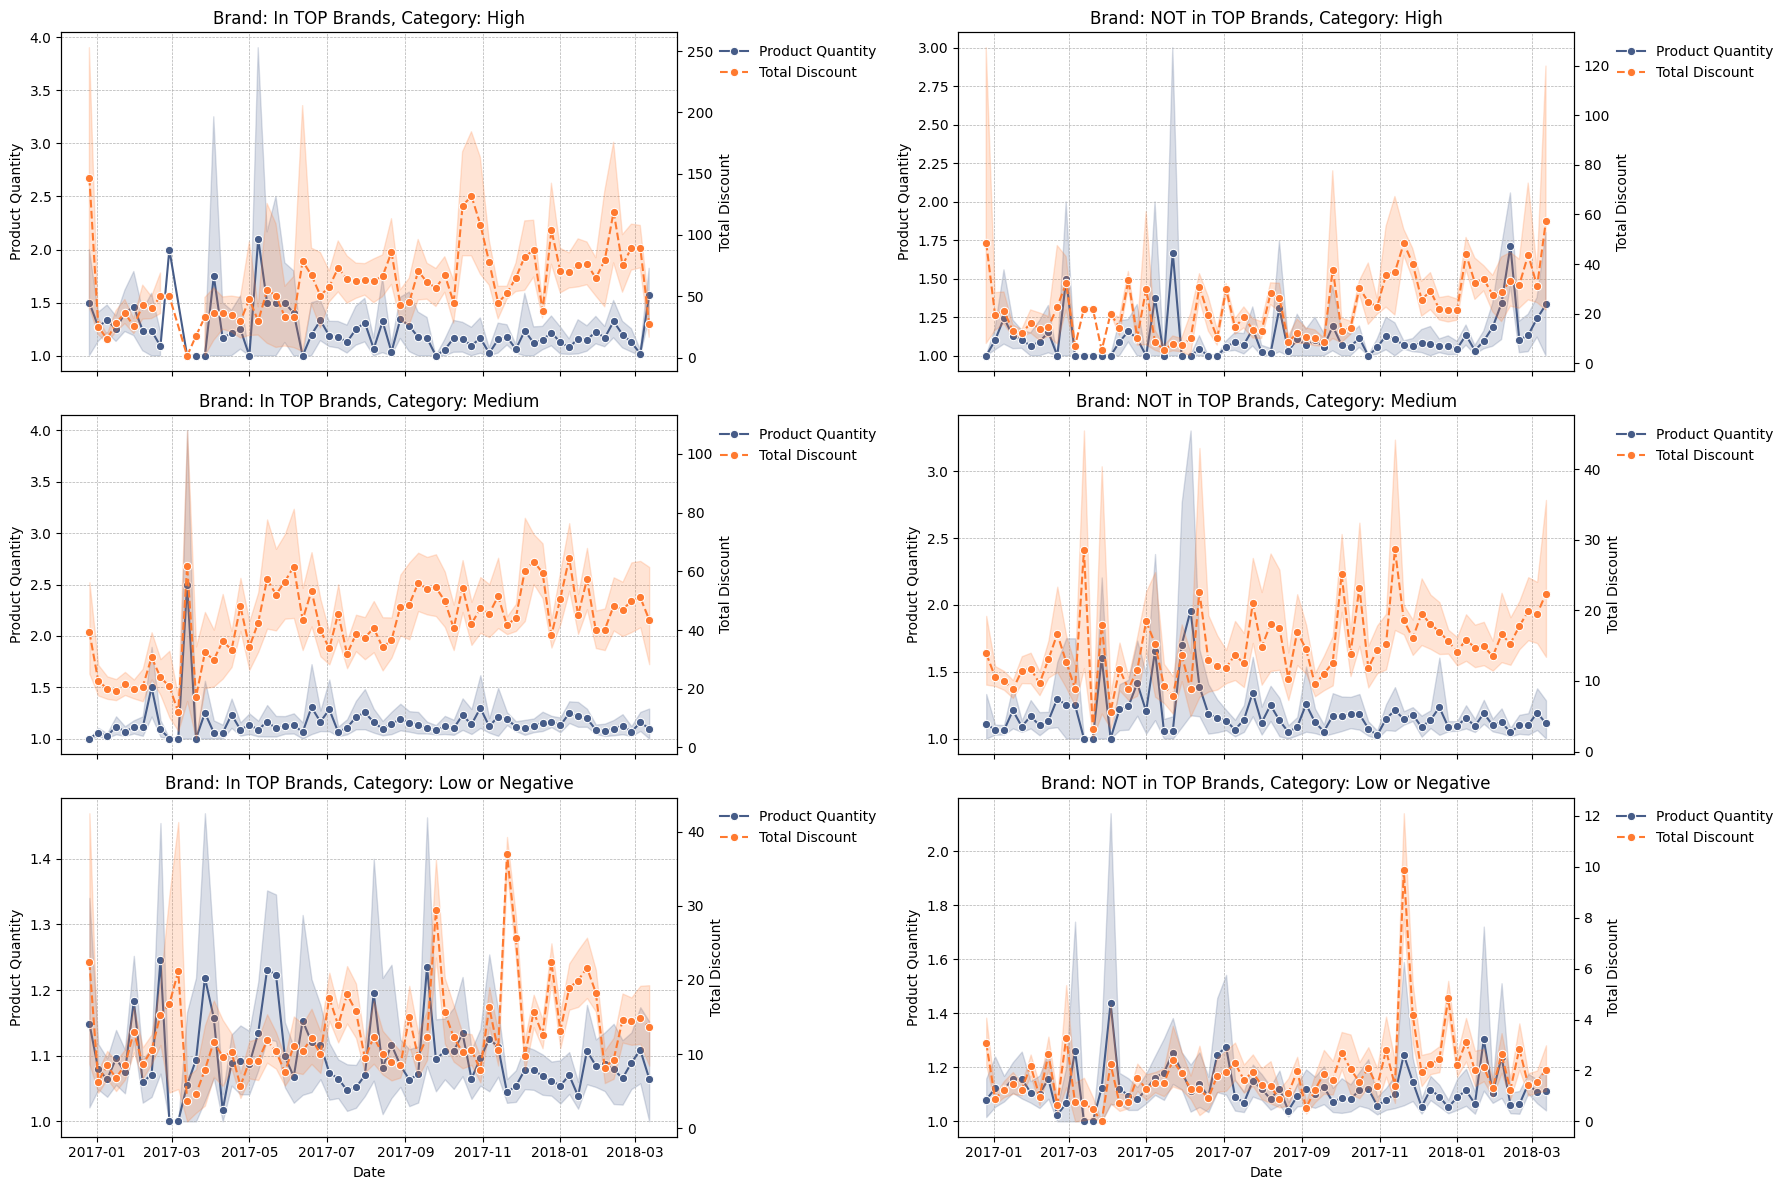

In [21]:
# Get unique values for top_brand and disc_cat
# brands = [ "Seagate", "Apple"]
week_t10_discCat['top_brand'].unique()
# disc_cats = week_t10_discCat['disc_cat'].unique()
disc_cats = ['High', 'Medium', 'Low or Negative' ]


# Create a figure and a grid of subplots
fig, axes = plt.subplots(
    nrows=len(disc_cats),
    ncols=len(brands),
    figsize=(18, 12),
    sharex=True
)

# Iterate through each combination of brand and category to create a subplot
for i, cat in enumerate(disc_cats):
    for j, brand in enumerate(brands):
        # Select the correct subplot
        ax1 = axes[i, j]
        
        # Filter the data for the current brand and category
        subset_data = week_t10_discCat[
            (week_t10_discCat['top_brand'] == brand) & # (week_t10_discCat['brand'] == brand) & #
            (week_t10_discCat['disc_cat'] == cat)
        ]

        # Plot product_quantity on the first axis (ax1)
        sns.lineplot(
            data=subset_data,
            # Convert the Period object back to a Timestamp
            x=subset_data.date.dt.to_period("W").dt.to_timestamp(), # <-- Change is here
            y="product_quantity",
            ax=ax1,
            marker='o',
            label="Product Quantity",
            color='#465C88'
        )

        # Create a second y-axis (twinx)
        ax2 = ax1.twinx()

        # Plot total_discount on the second axis (ax2)
        sns.lineplot(
            data=subset_data,
            # Convert the Period object back to a Timestamp
            x=subset_data.date.dt.to_period("W").dt.to_timestamp(), # <-- Change is here
            y="total_discount",
            ax=ax2,
            marker='o',
            linestyle='--',
            label="Total Discount",
            color='#FF7A30'
        )

        # Set titles and labels for the subplot
        ax1.set_title(f"Brand: {brand}, Category: {cat}")
        ax1.set_xlabel("Date")
        ax1.set_ylabel("Product Quantity")
        ax2.set_ylabel("Total Discount")
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

        # Combine and position the legends
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.05, 1))
        ax1.get_legend().get_frame().set_alpha(0.0)
        ax2.get_legend().remove()

# Adjust the layout to prevent labels from overlapping
plt.tight_layout()
fig.savefig('./Charts/8brands_qty-dicounts-discountsV2.png', dpi=300, transparent=True)
plt.show()

In [22]:
week_t10_discCat = monthlyINF_brands_cats.groupby(["date" , "top_brand", "disc_cat", "brand"]).agg({
    "revenue": "sum",
    "product_quantity": "sum",
    "total_discount": "sum",
    "id_order": "count",
    "percentage_discount": "mean"
}).reset_index()

# Get unique values for top_brand and disc_cat
brands = week_t10_discCat['top_brand'].unique()
disc_cats = ['High', 'Medium', "Low or Negative"]

top = week_t10_discCat.loc[week_t10_discCat.top_brand == "In TOP Brands"].groupby("brand").sum("revenue").nlargest(1, columns="revenue").index
notTop = week_t10_discCat.loc[week_t10_discCat.top_brand != "In TOP Brands"].groupby("brand").sum("revenue").nlargest(1, columns="revenue").index
print(top, "\n***************************\n", notTop)

# week_t10_discCat.to_csv("calc_correlation_base.csv", index=False)
# week_t10_discCat.loc[(week_t10_discCat.brand == "Seagate")| (week_t10_discCat.brand == "Apple")].to_csv("calc_correlationV2.csv", index=False)
two_brands_correlation = monthlyINF_brands_cats.groupby(["date", "brand" , "disc_cat"]).agg({
    "product_quantity": "sum",
    "percentage_discount": "mean"
}).reset_index()

two_brands_correlation = two_brands_correlation.loc[(two_brands_correlation.brand == top[0]) | (two_brands_correlation.brand == notTop[0])]

correlation_by_group = two_brands_correlation.groupby(['brand', 'disc_cat'])[['product_quantity', 'percentage_discount']].corr()

correlation_series = correlation_by_group.unstack().iloc[:, 1]
correlation_series.name = 'correlation_coefficient'

corr_df = correlation_series.reset_index()

corr_df.to_csv("correlation_results_two_brands.csv", index=False)

corr_df

Index(['Apple'], dtype='object', name='brand') 
***************************
 Index(['Samsung'], dtype='object', name='brand')


,brand,disc_cat,correlation_coefficient
0,Apple,High,0.090661
1,Apple,Low or Negative,0.044753
2,Apple,Medium,0.008061
3,Samsung,High,-0.152006
4,Samsung,Low or Negative,0.015944
5,Samsung,Medium,-0.035055


In [30]:
correlation_by_ = monthlyINF_brands_cats.groupby(["disc_cat", "brand", "top_brand", "top_category", "category"])[['product_quantity', 'percentage_discount']].corr()
correlation_series_ = correlation_by_.unstack().iloc[:, 1]
correlation_series_.name = 'correlation_coefficient_'

correlation_series_.to_csv("brand_groups_categories_corr.csv")

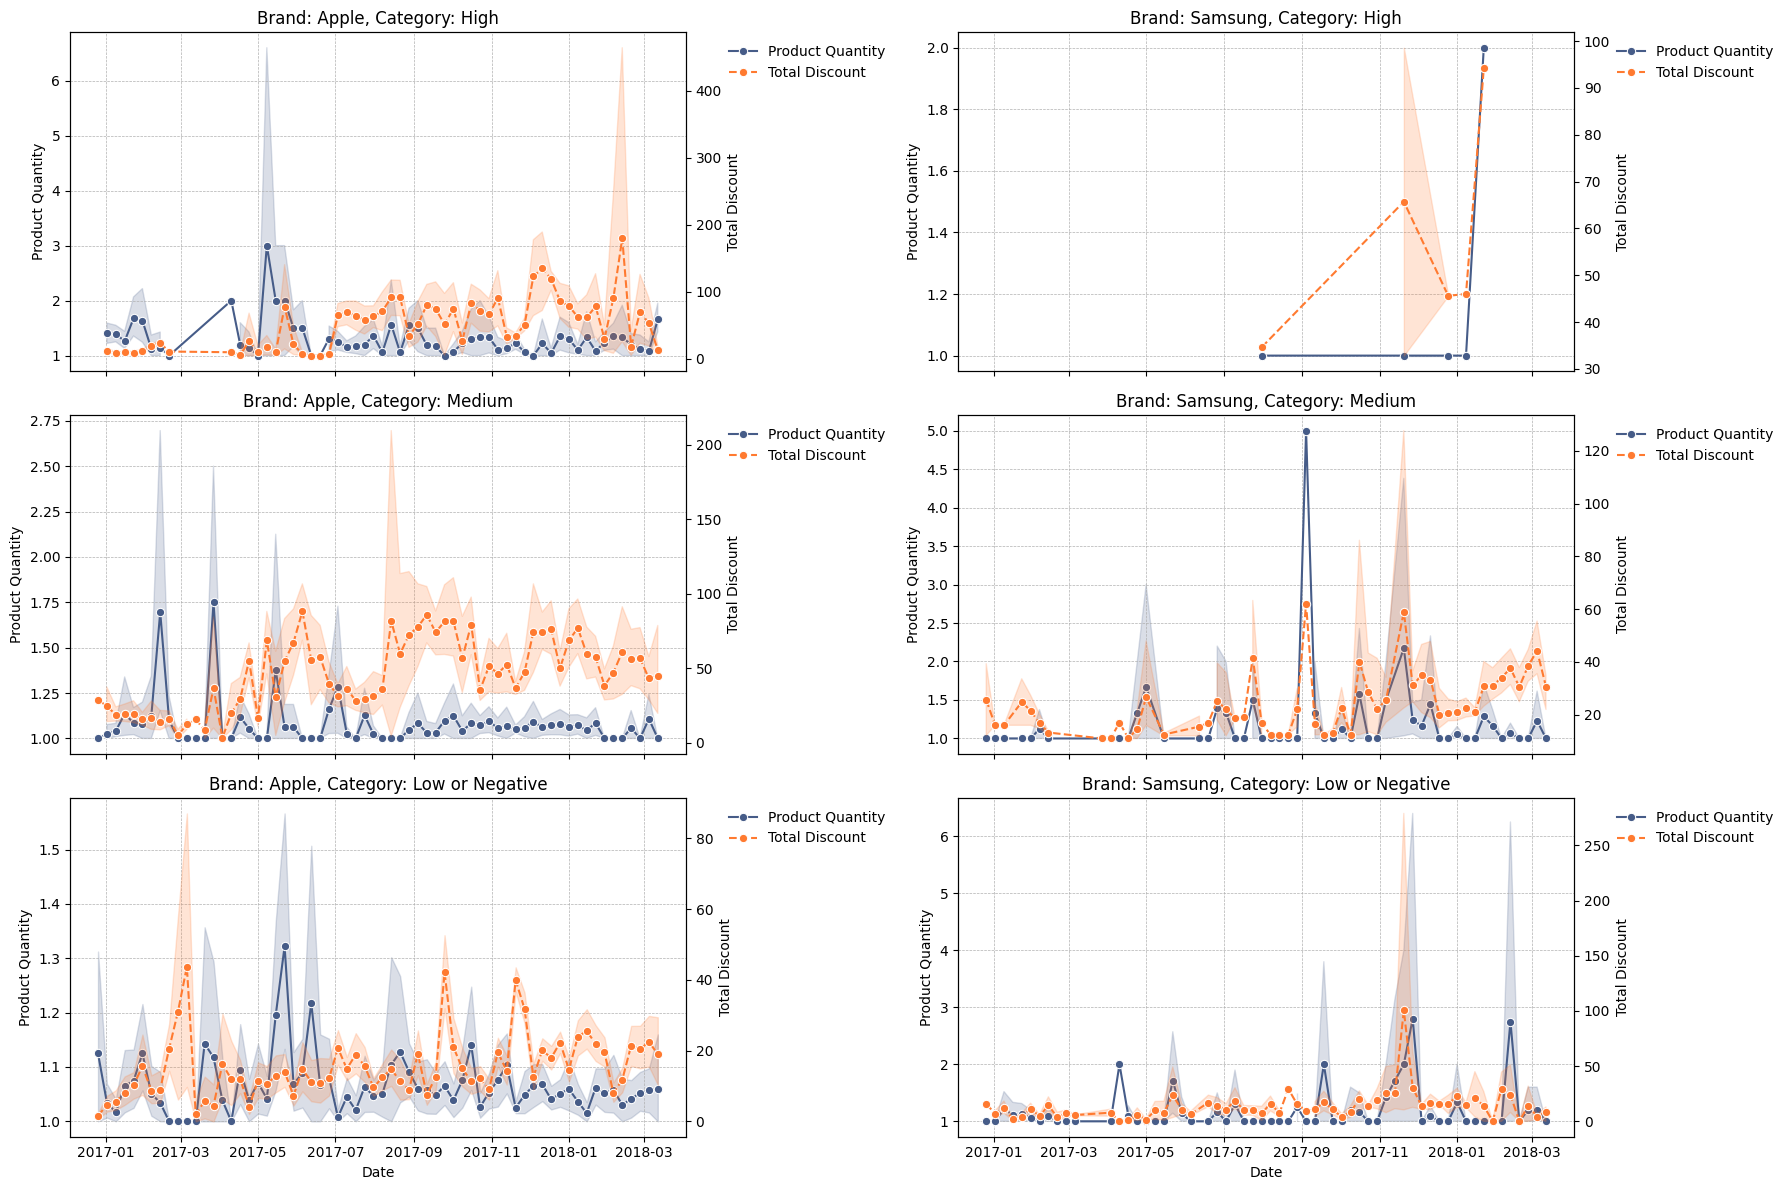

In [23]:
two_brands_correlation.to_csv("two_brands_correlation.csv")
# Get unique values for top_brand and disc_cat

brands = [top[0], notTop[0]]
# disc_cats = week_t10_discCat['disc_cat'].unique()
disc_cats = ['High', 'Medium', 'Low or Negative' ]


# Create a figure and a grid of subplots
fig, axes = plt.subplots(
    nrows=len(disc_cats),
    ncols=len(brands),
    figsize=(18, 12),
    sharex=True
)

# Iterate through each combination of brand and category to create a subplot
for i, cat in enumerate(disc_cats):
    for j, brand in enumerate(brands):
        # Select the correct subplot
        ax1 = axes[i, j]
        
        # Filter the data for the current brand and category
        subset_data = week_t10_discCat[
            (week_t10_discCat['brand'] == brand) &  #
            (week_t10_discCat['disc_cat'] == cat)
        ]

        # Plot product_quantity on the first axis (ax1)
        sns.lineplot(
            data=subset_data,
            # Convert the Period object back to a Timestamp
            x=subset_data.date.dt.to_period("W").dt.to_timestamp(), # <-- Change is here
            y="product_quantity",
            ax=ax1,
            marker='o',
            label="Product Quantity",
            color='#465C88'
        )

        # Create a second y-axis (twinx)
        ax2 = ax1.twinx()

        # Plot total_discount on the second axis (ax2)
        sns.lineplot(
            data=subset_data,
            # Convert the Period object back to a Timestamp
            x=subset_data.date.dt.to_period("W").dt.to_timestamp(), # <-- Change is here
            y="total_discount",
            ax=ax2,
            marker='o',
            linestyle='--',
            label="Total Discount",
            color='#FF7A30'
        )

        # Set titles and labels for the subplot
        ax1.set_title(f"Brand: {brand}, Category: {cat}")
        ax1.set_xlabel("Date")
        ax1.set_ylabel("Product Quantity")
        ax2.set_ylabel("Total Discount")
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

        # Combine and position the legends
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.05, 1))
        ax1.get_legend().get_frame().set_alpha(0.0)
        ax2.get_legend().remove()

# Adjust the layout to prevent labels from overlapping
plt.tight_layout()
fig.savefig('./Charts/9brands_qty-dicounts-discountsV_topvsnottop.png', dpi=300, transparent=True)
plt.show()